In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Antielettronici

In [2]:
input_file_antiel = uproot.open("NeutElec.root")
antiel = input_file_antiel["t"]
kin_antiel = antiel["Ekin"].array()
x_antiel, y_antiel = antiel["x"].array(), antiel["y"].array()
xcos_antiel, ycos_antiel = antiel["x_cos"].array(), antiel["y_cos"].array()
weight_antiel = antiel["weight"].array()

In [3]:
# selezioni i neutrini che arrivano al rivelatore
kin_antiel = kin_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]

x_antiel1 = x_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]

y_antiel1 = y_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]


xcos_antiel = xcos_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]

ycos_antiel = ycos_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]





weight_antiel = weight_antiel[
    np.logical_and(
        np.logical_and(x_antiel < -8.0, x_antiel > -47.6),
        np.logical_and(y_antiel < 55.1, y_antiel > 15.5),
    )
]


norm_antiel = 214285714

weight_antiel_1 = weight_antiel[weight_antiel == 1]
kin_antiel_1 = kin_antiel[weight_antiel == 1]
weight_antiel_not1 = weight_antiel[weight_antiel != 1]
kin_antiel_not1 = kin_antiel[weight_antiel != 1]
xcos_antiel_1 = xcos_antiel[weight_antiel == 1]
xcos_antiel_not1 = xcos_antiel[weight_antiel != 1]
ycos_antiel_1 = ycos_antiel[weight_antiel == 1]
ycos_antiel_not1 = ycos_antiel[weight_antiel != 1]
# spettro antielettronici

norm_antiel = 214285714
print(len(xcos_antiel),len(x_antiel1))

7552 7552


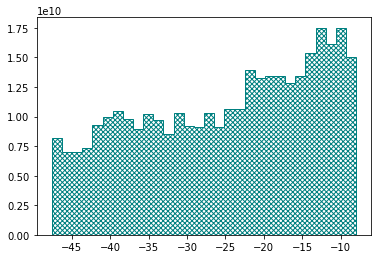

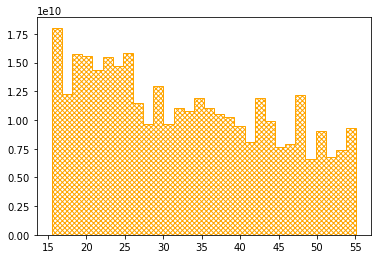

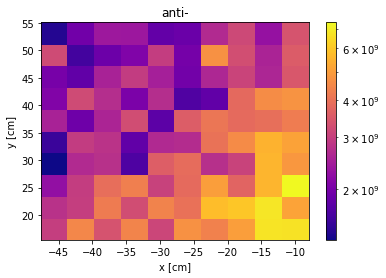

In [4]:
values_x, bins_x, patches_x = plt.hist(x_antiel1,bins= 30,
                                       weights=weight_antiel*norm_antiel,
                                       histtype='step',hatch='xxxxx',color='teal')

plt.show()
values_y, bins_y, patches_y = plt.hist(y_antiel1,bins= 30,
                                       weights=weight_antiel*norm_antiel,
                                       histtype='step',hatch='xxxxx',color='orange')
plt.show()

#### 2d map
import awkward
import matplotlib as mpl
x1_antiel=awkward.to_numpy(x_antiel1)
y1_antiel=awkward.to_numpy(y_antiel1)
we1_antiel=awkward.to_numpy(weight_antiel*norm_antiel)
fig,ax = plt.subplots()
histogram = ax.hist2d(x1_antiel,y1_antiel,
                      range=[[-47.6,-8.0],[15.5,55.1]],
                      #range=[[-60,0],[0,70]],
                      bins=[10,10],
                      cmap='plasma',
                      weights=we1_antiel,
                      norm=mpl.colors.LogNorm()
                     )

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title('anti-')
#plt.title('anti-$\N{small greek letter nu}')
fig.colorbar(histogram[3],ax = ax)

plt.show()

### Angolo e pseudorapidità

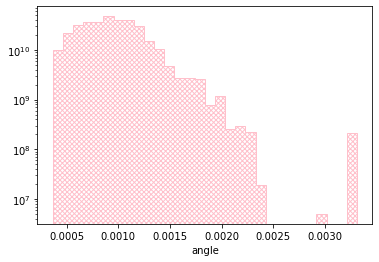

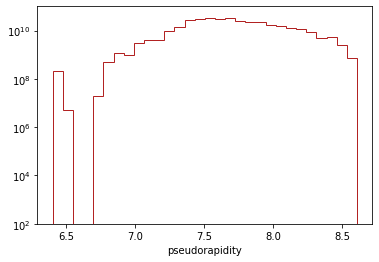

In [5]:
angle_antiel=(xcos_antiel**2+ycos_antiel**2)**(1/2)
#print(len(angle_antiel),len(weight_antiel))
plt.hist(angle_antiel,
         bins= 30,
         weights=weight_antiel*norm_antiel,
         histtype='step',hatch='xxxxx',color='pink',log=True)
plt.xlabel('angle')
plt.show()
pseudo_antiel = -np.log(np.tan(angle_antiel/2))
plt.hist(pseudo_antiel,
         bins= 30,
         weights=weight_antiel*norm_antiel,
         histtype='step',
         #hatch='xxxxx',
         color='firebrick',log=True)
plt.ylim([100,10**11])
plt.xlabel('pseudorapidity')
plt.show()

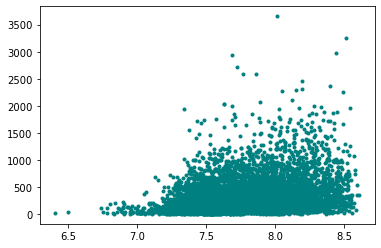

In [6]:
plt.scatter(pseudo_antiel,kin_antiel,s=9,color='teal')

##### Particolari

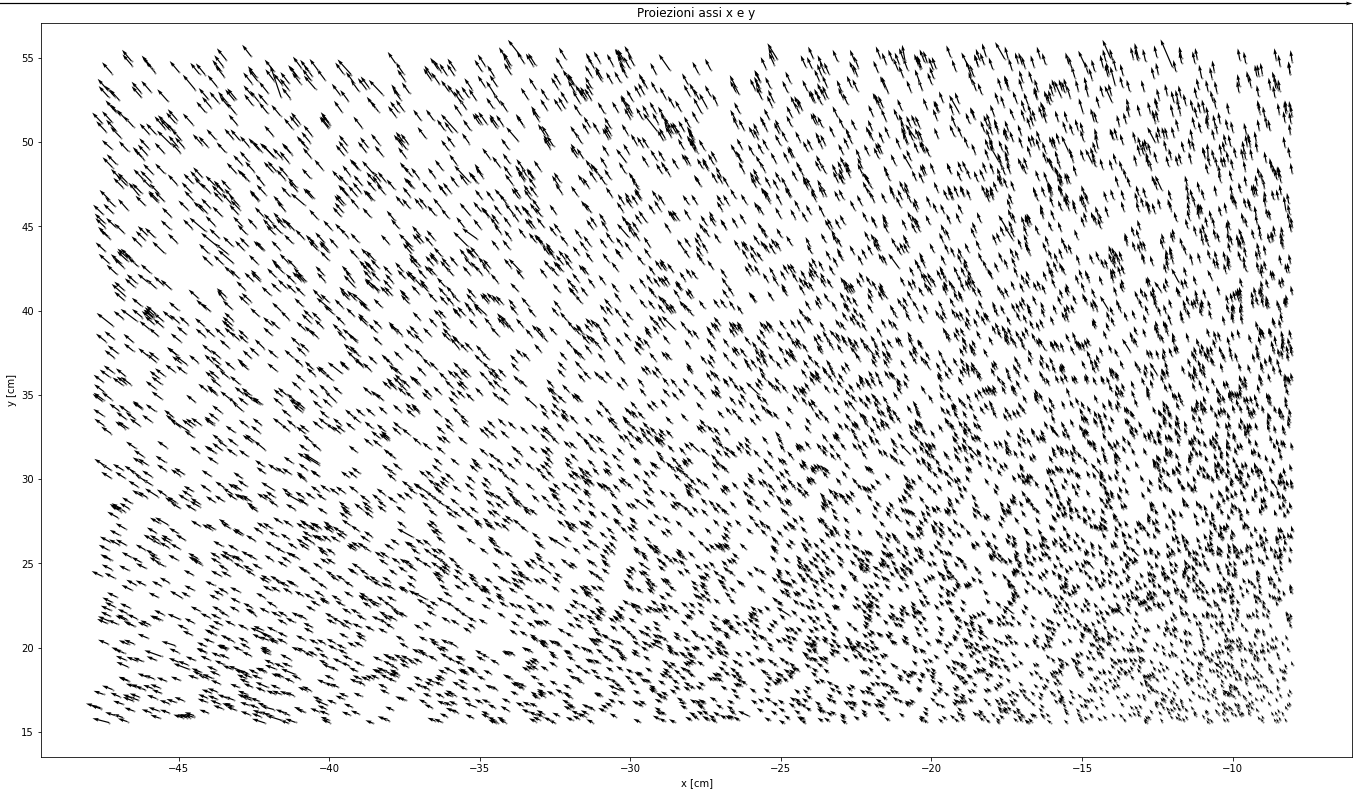

In [7]:
fig, ax = plt.subplots()
q = ax.quiver(x_antiel1, y_antiel1, xcos_antiel, ycos_antiel,width=0.00093,scale=0.13)
#ax.quiverkey(q, X=0.1, Y=5.1, U=5, label='Quiver key, length = 10', labelpos='E')
ax.quiverkey(q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax.set_ylabel('y [cm]')
ax.set_xlabel('x [cm]')
ax.set_title('Proiezioni assi x e y')
ax.scatter(x_antiel1, y_antiel1, color='0.5', s=1)
fig.set_size_inches(23.5, 13.5)
plt.show()

C:\Users\diesi\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\diesi\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


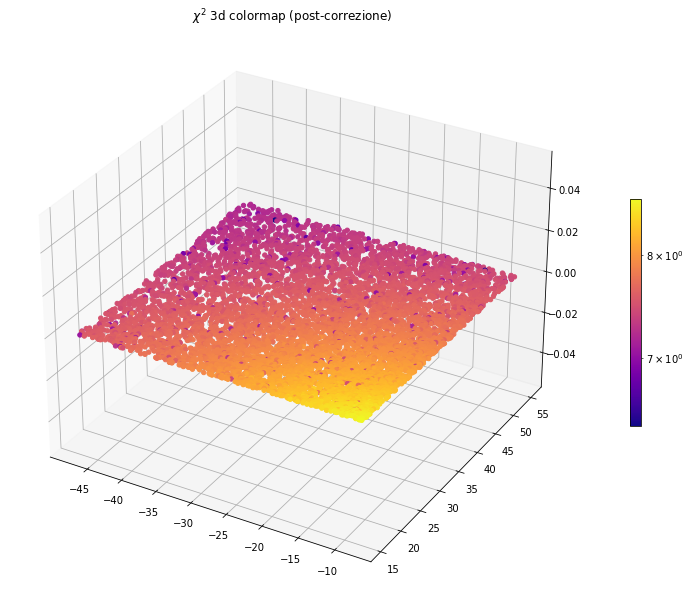

In [8]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors



thetaplasmafig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

PSEUDO_antiel = np.array(pseudo_antiel)
c = np.abs(PSEUDO_antiel)
#C_lati = np.abs(theta_lati)
#C_centro = np.abs(theta_centro)
X_antiel = np.array(x_antiel1)
Y_antiel = np.array(y_antiel1)

box = ax.scatter(X_antiel, Y_antiel, 
                 np.ones_like(X_antiel)*0, 
                 #PSEUDO_antiel,
                 PSEUDO_antiel, s = 19,  c = c, alpha = 1, cmap = cm.plasma,
                 norm=colors.LogNorm(vmin=min(PSEUDO_antiel), vmax=max(PSEUDO_antiel)), label = 'angoli',
                 )

ax.set_title('$\N{greek small letter chi}^2$ 3d colormap (post-correzione)')
plt.colorbar(box,shrink=0.399)
#figure(figsize=(15, 15), dpi=80)
#ax.legend()

plt.show()

In [10]:
import matplotlib.tri as mtri
triangles=mtri.triangles, cmap=cm.plasma
'''''''''
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(X_antiel, Y_antiel, PSEUDO_antiel,
                      triangles=tri.triangles, cmap=cm.plasma)
fig.set_size_inches(23.5, 13.5)
ax.set_zlim([5,9])
ax.set_zscale('log')
'''''''''
tri = mtri.Triangulation(u, v)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=cm.plasma)
ax.set_zlim(-1, 1)

TypeError: cannot unpack non-iterable ListedColormap object

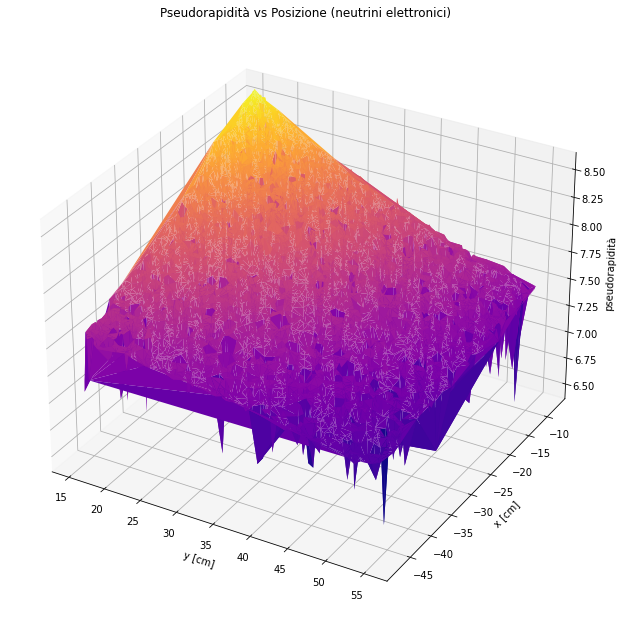

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
fig = plt.figure(figsize=plt.figaspect(0.5))

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(X_antiel, Y_antiel)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(Y_antiel, X_antiel, PSEUDO_antiel, triangles=tri.triangles, cmap=plt.cm.plasma)
fig.set_size_inches(23.5, 13.5)
ax.set_xlabel('y [cm]')
ax.set_ylabel('x [cm]')
ax.set_zlabel('pseudorapidità')
ax.set_title('Pseudorapidità vs Posizione (neutrini elettronici)')
#plt.colorbar(box,shrink=0.199)
#plt.colorbar(box,shrink=0.399)
plt.show()

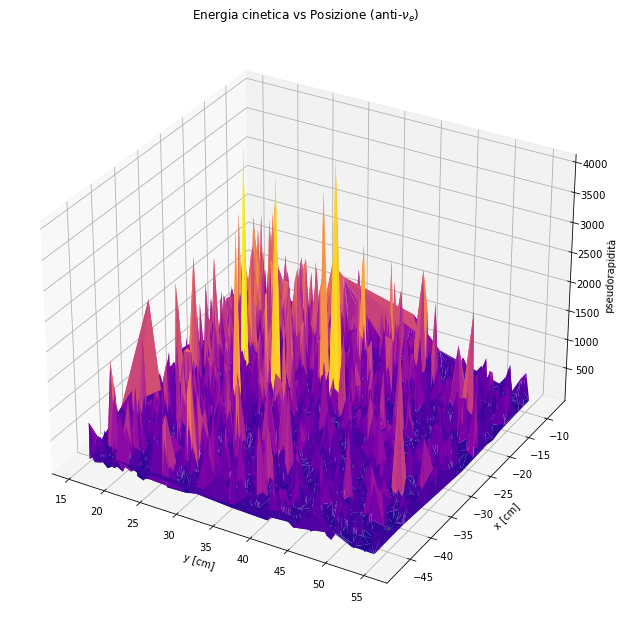

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
fig = plt.figure(figsize=plt.figaspect(0.5))

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(X_antiel, Y_antiel)
KIN_antiel = np.array(kin_antiel)
# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(Y_antiel, X_antiel, KIN_antiel, triangles=tri.triangles, cmap=plt.cm.plasma)
fig.set_size_inches(23.5, 13.5)
ax.set_xlabel('y [cm]')
ax.set_ylabel('x [cm]')
ax.set_zlabel('pseudorapidità')
ax.set_title('Energia cinetica vs Posizione (anti-$\N{greek small letter nu}_e$)')
plt.show()

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]


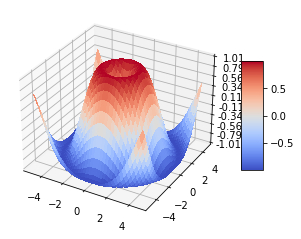

In [141]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
print(X)
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Differenze pions/kaons

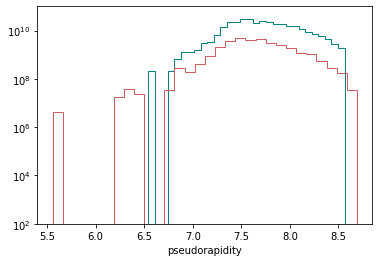

In [99]:
angle_antiel_1=(xcos_antiel_1**2+ycos_antiel_1**2)**(1/2)
angle_antiel_not1=(xcos_antiel_not1**2+ycos_antiel_not1**2)**(1/2)

pseudo_antiel_1 = -np.log(np.tan(angle_antiel_1/2))
pseudo_antiel_not1 = -np.log(np.tan(angle_antiel_not1/2))

plt.hist(pseudo_antiel_1,
         bins= 30,
         weights=weight_antiel_1*norm_antiel,
         histtype='step',
         #hatch='xxxxx',
         color='teal',log=True, label='1')

plt.hist(pseudo_antiel_not1,
         bins= 30,
         weights=weight_antiel_not1*norm_antiel,
         histtype='step',
         #hatch='xxxxx',
         color='indianred',log=True, label='not 1')




plt.ylim([100,10**11])
plt.xlabel('pseudorapidity')
plt.show()

# Elettronici

In [89]:
input_file_el = uproot.open("NeutElec.root")
el = input_file_el["t"]
kin_el = el["Ekin"].array()
x_el, y_el = el["x"].array(), el["y"].array()
xcos_el, ycos_el = el["x_cos"].array(), el["y_cos"].array()
weight_el = el["weight"].array()